In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score,precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("C:/Users/lavle/Downloads/DS Intern Dataset/DS Intern Dataset/intern dataset.csv")

Checking the sample of data

In [3]:
data.head(10)

,labels,0_before_rr,0_after-rr,0_p,0_t,0_r,0_s,0_q,0_qeres,0_pq,...,1_q,1_qeres,1_pq,1_qt,1_st,1_qeres_0,1_qeres_1,1_qeres_2,1_qeres_3,1_qeres_4
0,NN,2,194,0.003261,0.159554,-0.046726,-0.046726,-0.129022,4,17,...,-0.131451,29.0,17.0,95.0,49.0,-0.131451,-0.015809,0.109493,-0.153622,-0.200331
1,NN,194,188,-0.058462,0.067970,0.285091,-0.272093,-0.062109,25,3,...,-0.048727,25.0,2.0,76.0,49.0,-0.048727,0.034657,0.282264,-0.013981,-0.226871
2,NN,188,194,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,29,1,...,-0.005256,29.0,5.0,53.0,19.0,-0.005256,0.007639,0.116198,0.271552,-0.114414
3,NN,194,198,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,36,9,...,-0.069992,35.0,26.0,76.0,15.0,-0.069992,-0.049489,0.030777,0.378075,-0.074389
4,NN,198,196,-0.047353,0.164835,0.364677,-0.207953,-0.061457,39,6,...,-0.072007,35.0,25.0,115.0,55.0,-0.072007,-0.053251,0.044583,0.313201,-0.157637
5,NN,196,196,-0.022602,-0.099087,0.343238,-0.186263,-0.026539,25,4,...,-0.031926,26.0,3.0,50.0,21.0,-0.031926,-0.015393,0.184055,0.289607,-0.072483
6,NN,196,206,0.023462,-0.121653,0.361036,-0.197916,-0.058191,39,23,...,-0.078307,40.0,23.0,116.0,53.0,-0.078307,-0.047192,0.016851,0.373676,-0.075516
7,NN,206,200,0.011660,0.312826,0.366903,-0.262769,-0.006236,27,7,...,0.009944,28.0,7.0,52.0,17.0,0.009944,0.041408,0.319708,0.190725,-0.190172
8,NN,200,196,0.231686,0.129188,0.663638,0.083880,-0.000869,27,19,...,0.002497,26.0,20.0,52.0,6.0,0.002497,0.119750,0.327984,0.622504,0.421609
9,NN,196,190,0.143086,0.087247,0.272568,-0.208653,-0.096745,17,20,...,-0.110362,16.0,20.0,45.0,9.0,-0.110362,-0.045932,0.138921,0.206715,0.017013


Features of the data

In [4]:
data.columns

Index(['labels', '0_before_rr', '0_after-rr', '0_p', '0_t', '0_r', '0_s',
       '0_q', '0_qeres', '0_pq', '0_qt', '0_st', '0_qeres_0', '0_qeres_1',
       '0_qeres_2', '0_qeres_3', '0_qeres_4', '1_before-rr', '1_after-rr',
       '1_p', '1_t', '1_r', '1_s', '1_q', '1_qeres', '1_pq', '1_qt', '1_st',
       '1_qeres_0', '1_qeres_1', '1_qeres_2', '1_qeres_3', '1_qeres_4'],
      dtype='object')

Size of the dataset

In [5]:
data.shape

(426591, 33)

Checking the datatypes of all the features

In [6]:
data.dtypes

labels          object
0_before_rr      int64
0_after-rr       int64
0_p            float64
0_t            float64
0_r            float64
0_s            float64
0_q            float64
0_qeres          int64
0_pq             int64
0_qt             int64
0_st             int64
0_qeres_0      float64
0_qeres_1      float64
0_qeres_2      float64
0_qeres_3      float64
0_qeres_4      float64
1_before-rr    float64
1_after-rr     float64
1_p            float64
1_t            float64
1_r            float64
1_s            float64
1_q            float64
1_qeres        float64
1_pq           float64
1_qt           float64
1_st           float64
1_qeres_0      float64
1_qeres_1      float64
1_qeres_2      float64
1_qeres_3      float64
1_qeres_4      float64
dtype: object

Values distribution of the labels feature

In [7]:
data.labels.value_counts()

labels
NN       403528
VEBER     14723
QQ         6520
SEVEB      1609
FF          211
Name: count, dtype: int64

Statistical value distribution of the numerical features

In [8]:
data.describe()

,0_before_rr,0_after-rr,0_p,0_t,0_r,0_s,0_q,0_qeres,0_pq,0_qt,...,1_q,1_qeres,1_pq,1_qt,1_st,1_qeres_0,1_qeres_1,1_qeres_2,1_qeres_3,1_qeres_4
count,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,426591.000000,...,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000,251976.000000
mean,229.428994,229.528063,0.060205,0.571717,0.260093,-0.158574,-0.077361,19.515555,12.388290,55.025230,...,-0.169446,7.055851,10.087481,29.150141,12.006810,-0.169446,-0.183518,-0.197956,-0.213318,-0.247897
std,52.765916,55.298502,0.156438,0.563064,0.403469,0.368323,0.121842,14.753913,10.731138,37.906418,...,0.160498,10.529824,6.950514,16.005089,7.918052,0.160498,0.165093,0.193692,0.222878,0.214587
min,2.000000,14.000000,-1.601843,-1.640672,-2.224594,-3.106228,-2.931771,0.000000,1.000000,2.000000,...,-1.877860,0.000000,1.000000,3.000000,1.000000,-1.877860,-1.877860,-1.877860,-1.851834,-1.851834
25%,192.000000,192.000000,-0.007642,0.142914,-0.034951,-0.483457,-0.107943,7.000000,5.000000,28.000000,...,-0.237663,2.000000,5.000000,18.000000,6.000000,-0.237663,-0.267482,-0.316498,-0.370283,-0.411905
50%,224.000000,224.000000,0.030988,0.366103,0.065296,-0.061481,-0.061239,19.000000,10.000000,44.000000,...,-0.126988,4.000000,8.000000,28.000000,10.000000,-0.126988,-0.160528,-0.212879,-0.254851,-0.257172
75%,270.000000,270.000000,0.087963,1.092672,0.629200,-0.012880,-0.029183,30.000000,17.000000,65.000000,...,-0.063244,6.000000,15.000000,37.000000,18.000000,-0.063244,-0.070056,-0.066413,-0.065075,-0.071536
max,2228.000000,10964.000000,3.341772,2.759539,2.434247,2.404205,2.050436,232.000000,128.000000,274.000000,...,1.294161,140.000000,127.000000,248.000000,115.000000,1.294161,1.275964,2.099905,1.437327,1.253709


Summary of the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426591 entries, 0 to 426590
Data columns (total 33 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   labels       426591 non-null  object 
 1   0_before_rr  426591 non-null  int64  
 2   0_after-rr   426591 non-null  int64  
 3   0_p          426591 non-null  float64
 4   0_t          426591 non-null  float64
 5   0_r          426591 non-null  float64
 6   0_s          426591 non-null  float64
 7   0_q          426591 non-null  float64
 8   0_qeres      426591 non-null  int64  
 9   0_pq         426591 non-null  int64  
 10  0_qt         426591 non-null  int64  
 11  0_st         426591 non-null  int64  
 12  0_qeres_0    426591 non-null  float64
 13  0_qeres_1    426591 non-null  float64
 14  0_qeres_2    426591 non-null  float64
 15  0_qeres_3    426591 non-null  float64
 16  0_qeres_4    426591 non-null  float64
 17  1_before-rr  251976 non-null  float64
 18  1_after-rr   251976 non-

Identifying the Missing Values

In [10]:
data.isnull().sum()

labels              0
0_before_rr         0
0_after-rr          0
0_p                 0
0_t                 0
0_r                 0
0_s                 0
0_q                 0
0_qeres             0
0_pq                0
0_qt                0
0_st                0
0_qeres_0           0
0_qeres_1           0
0_qeres_2           0
0_qeres_3           0
0_qeres_4           0
1_before-rr    174615
1_after-rr     174615
1_p            174615
1_t            174615
1_r            174615
1_s            174615
1_q            174615
1_qeres        174615
1_pq           174615
1_qt           174615
1_st           174615
1_qeres_0      174615
1_qeres_1      174615
1_qeres_2      174615
1_qeres_3      174615
1_qeres_4      174615
dtype: int64

In [11]:
si = SimpleImputer(strategy= 'mean')

Transforming the missing values to their respective feature mean

In [12]:
data[['1_before-rr','1_after-rr','1_p','1_t','1_r','1_s','1_q','1_qeres','1_pq','1_qt','1_st','1_qeres_0','1_qeres_1','1_qeres_2','1_qeres_3','1_qeres_4']] = si.fit_transform(data[['1_before-rr','1_after-rr','1_p','1_t','1_r','1_s','1_q','1_qeres','1_pq','1_qt','1_st','1_qeres_0','1_qeres_1','1_qeres_2','1_qeres_3','1_qeres_4']])

Checking the missing values

In [13]:
data.isnull().sum()

labels         0
0_before_rr    0
0_after-rr     0
0_p            0
0_t            0
0_r            0
0_s            0
0_q            0
0_qeres        0
0_pq           0
0_qt           0
0_st           0
0_qeres_0      0
0_qeres_1      0
0_qeres_2      0
0_qeres_3      0
0_qeres_4      0
1_before-rr    0
1_after-rr     0
1_p            0
1_t            0
1_r            0
1_s            0
1_q            0
1_qeres        0
1_pq           0
1_qt           0
1_st           0
1_qeres_0      0
1_qeres_1      0
1_qeres_2      0
1_qeres_3      0
1_qeres_4      0
dtype: int64

Creating Box Plot for detecting Outliers

<Axes: >

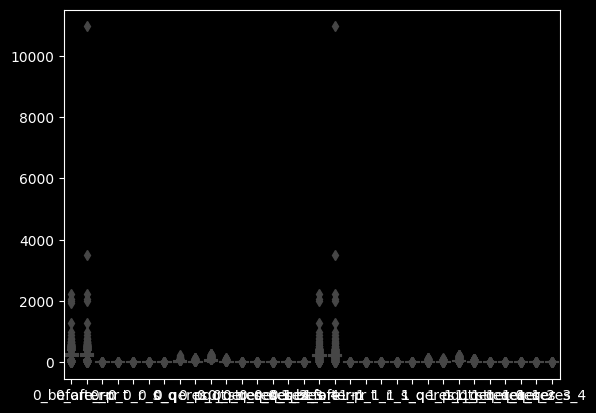

In [14]:
sns.boxplot(data)

Featuers which are containing outliers

In [15]:
data.columns[[1,16,17]]

Index(['0_before_rr', '0_qeres_4', '1_before-rr'], dtype='object')

Calculating Z_Scores for the outlier Featuers

In [16]:
z_scores = stats.zscore(data['0_before_rr'])
z_scores1 = stats.zscore(data['0_qeres_4'])
z_scores2 = stats.zscore(data['1_before-rr'])

Calculating the Abosolute Values for the outlier Featuers

In [17]:
abs_z_scores = np.abs(z_scores)
abs_z_scores1 = np.abs(z_scores1)
abs_z_scores2 = np.abs(z_scores2)

Finding out the Indexes of the outliers

In [18]:
indices_of_outliers = np.where(abs_z_scores > 3)
indices_of_outliers1 = np.where(abs_z_scores1 > 3)
indices_of_outliers2 = np.where(abs_z_scores2 > 3)

In [19]:
indices_of_outliers2

(array([     0,     35,     98, ..., 426588, 426589, 426590], dtype=int64),)

In [20]:
outliers = list(indices_of_outliers[0])
outliers1 = list(indices_of_outliers1[0])
outliers2 = list(indices_of_outliers2[0])

In [21]:
outliers

[0,
 35,
 98,
 201,
 264,
 267,
 340,
 358,
 555,
 607,
 640,
 1323,
 1325,
 1490,
 1546,
 1665,
 1957,
 2087,
 2088,
 2090,
 2091,
 2104,
 2110,
 2152,
 2234,
 2592,
 3218,
 3223,
 3233,
 3245,
 3251,
 4071,
 5781,
 6209,
 6210,
 6383,
 6794,
 6822,
 6842,
 6859,
 6968,
 6996,
 7003,
 7677,
 7892,
 7917,
 10289,
 10307,
 10344,
 11140,
 11224,
 11298,
 11786,
 12639,
 13421,
 13424,
 13445,
 13457,
 13498,
 13560,
 13566,
 13656,
 13660,
 13665,
 14373,
 14643,
 14669,
 14852,
 14918,
 14919,
 15011,
 15012,
 15088,
 15875,
 15995,
 16000,
 16218,
 16229,
 16235,
 16243,
 16252,
 16733,
 16832,
 18310,
 18317,
 18319,
 19511,
 19540,
 19879,
 20408,
 20493,
 26564,
 26747,
 26751,
 26921,
 26986,
 27599,
 27601,
 27963,
 28030,
 28440,
 28710,
 28748,
 28753,
 28810,
 29148,
 29198,
 29199,
 30859,
 30860,
 30923,
 30935,
 30937,
 30976,
 31930,
 40550,
 40861,
 52897,
 80806,
 84338,
 96429,
 104974,
 106054,
 106056,
 106064,
 106065,
 106067,
 106068,
 106072,
 106073,
 106074,
 10

Dropping some datapoints of the outliers features

In [22]:
data = data.drop(index= outliers)

In [23]:
data

,labels,0_before_rr,0_after-rr,0_p,0_t,0_r,0_s,0_q,0_qeres,0_pq,...,1_q,1_qeres,1_pq,1_qt,1_st,1_qeres_0,1_qeres_1,1_qeres_2,1_qeres_3,1_qeres_4
1,NN,194,188,-0.058462,0.067970,0.285091,-0.272093,-0.062109,25,3,...,-0.048727,25.0,2.0,76.0,49.0,-0.048727,0.034657,0.282264,-0.013981,-0.226871
2,NN,188,194,-0.012959,-0.089749,0.329466,-0.204659,-0.012971,29,1,...,-0.005256,29.0,5.0,53.0,19.0,-0.005256,0.007639,0.116198,0.271552,-0.114414
3,NN,194,198,-0.032815,-0.113236,0.398437,-0.178191,-0.068497,36,9,...,-0.069992,35.0,26.0,76.0,15.0,-0.069992,-0.049489,0.030777,0.378075,-0.074389
4,NN,198,196,-0.047353,0.164835,0.364677,-0.207953,-0.061457,39,6,...,-0.072007,35.0,25.0,115.0,55.0,-0.072007,-0.053251,0.044583,0.313201,-0.157637
5,NN,196,196,-0.022602,-0.099087,0.343238,-0.186263,-0.026539,25,4,...,-0.031926,26.0,3.0,50.0,21.0,-0.031926,-0.015393,0.184055,0.289607,-0.072483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426583,NN,152,144,0.238809,-0.399701,1.330275,-0.661595,-0.016162,17,6,...,0.697088,45.0,8.0,57.0,4.0,0.697088,0.348101,0.078044,-0.113000,-0.235894
426584,NN,144,160,0.427150,1.137365,-0.864114,-1.890495,-0.864114,4,5,...,0.879636,15.0,2.0,22.0,5.0,0.879636,0.644648,0.343882,-0.113923,-0.744869
426585,NN,160,76,1.212635,-0.716662,1.409060,-1.303325,-0.808265,25,8,...,-0.328020,1.0,8.0,18.0,9.0,-0.328020,-0.328020,-0.328020,-0.328020,-0.328020
426586,NN,76,148,-0.345439,1.086720,-0.213846,-0.213846,-0.699650,24,11,...,-0.443458,1.0,8.0,29.0,20.0,-0.443458,-0.443458,-0.443458,-0.443458,-0.443458


<Axes: >

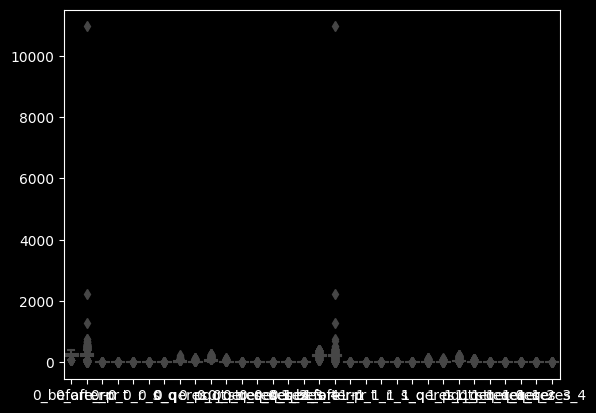

In [24]:
sns.boxplot(data)

In [25]:
np.where(abs_z_scores1 > 5)

(array([161893, 170134, 223024, 225089, 240431, 373436, 374098, 414453,
        414806, 414820, 417075, 420229, 420259, 421245, 421248, 421273,
        421287, 421289, 421327, 421337, 421343, 421345, 421346, 421347,
        421348, 421349, 421353, 421356, 421359, 421360, 421372, 421374,
        421376, 421379, 421422, 421424, 421430, 421433, 421435, 421445,
        421615, 422401, 422574, 423600, 423724, 423736, 423743, 423752,
        423754, 423835, 423929, 423938, 423949, 424025, 424144, 424256,
        424310, 424882, 424971, 425172, 425182, 425213, 425217, 425221,
        425230, 425240, 425241, 425265, 426095, 426292, 426584],
       dtype=int64),)

In [26]:
data = data.drop(index= [161893, 170134, 223024, 225089, 373436, 374098, 414453,
        414806, 414820, 417075, 420229, 421245, 421248, 421273,
        421287, 421289, 421327, 421337, 421343, 421345, 421346, 421347,
        421348, 421349, 421353, 421356, 421359, 421360, 421372, 421374,
        421376, 421379, 421422, 421424, 421430, 421433, 421435, 421445,
        421615, 422401, 422574, 423600, 423724, 423736, 423743, 423752,
        423754, 423835, 423929, 423938, 423949, 424025, 424144, 424256,
        424310, 424882, 424971, 425172, 425182, 425213, 425217,
         425240, 425241, 425265, 426095, 426292, 426584])

<Axes: >

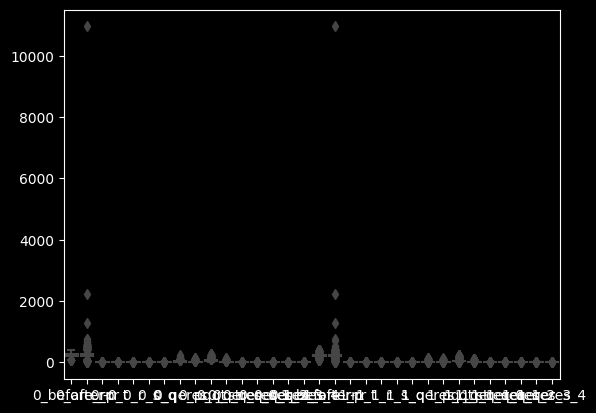

In [27]:
sns.boxplot(data = data)

Checking the Correlation between all the features

<Axes: >

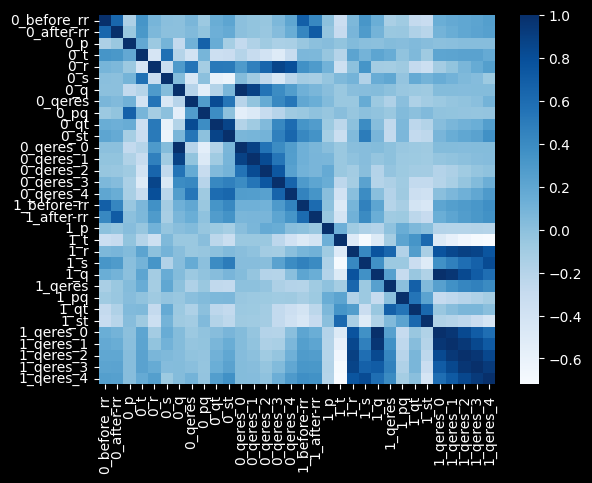

In [28]:
data_corr = data.drop(labels= 'labels', axis = 1)
correleation = data_corr.corr()
sns.heatmap(correleation, xticklabels= correleation.columns, yticklabels= correleation.columns, cmap= 'Blues')

Removing features according to correlation data

In [29]:
data = data.drop(labels= ['0_after-rr','0_q','0_r','1_before-rr','1_qeres_0','1_qeres_1','1_r'],axis = 1)

Dividing the dataset into train case and test case

In [30]:
X = data.drop(labels= 'labels', axis= 1)
y = data.iloc[:,0]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3)

In [32]:
ss = StandardScaler()

Scaling all the features to mean to nearly to zero and variance to nearly one

In [33]:
X_train = ss.fit_transform(X_train)

In [37]:
X_train = pd.DataFrame(X_train,columns= ['0_before_rr', '0_p', '0_t', '0_s', '0_qeres', '0_pq', '0_qt',
       '0_st', '0_qeres_0', '0_qeres_1', '0_qeres_2', '0_qeres_3', '0_qeres_4',
       '1_after-rr', '1_p', '1_t', '1_s', '1_q', '1_qeres', '1_pq', '1_qt',
       '1_st', '1_qeres_2', '1_qeres_3', '1_qeres_4'])

In [38]:
X_test = ss.transform(X_test)

In [39]:
X_test = pd.DataFrame(X_test,columns= ['0_before_rr', '0_p', '0_t', '0_s', '0_qeres', '0_pq', '0_qt',
       '0_st', '0_qeres_0', '0_qeres_1', '0_qeres_2', '0_qeres_3', '0_qeres_4',
       '1_after-rr', '1_p', '1_t', '1_s', '1_q', '1_qeres', '1_pq', '1_qt',
       '1_st', '1_qeres_2', '1_qeres_3', '1_qeres_4'])

Using ML Alogrithms to get the predications

0.9633660352981247
0.9628924210466715
0.9678088977653367
[[     0     63      0      0      4]
 [     0 119602    120      5    674]
 [     0    803   1125      0     12]
 [     0    463      0      3      7]
 [     0   1904     37      2   2354]]


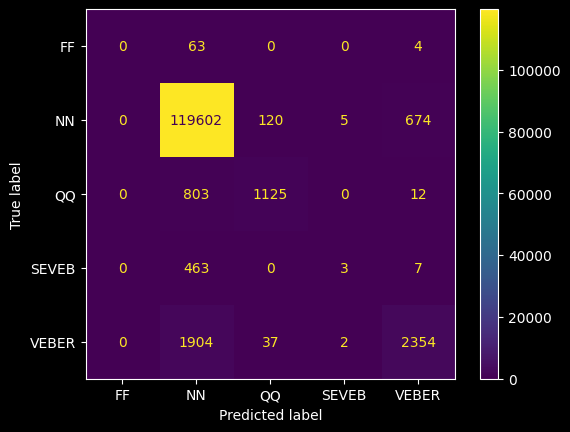

In [40]:
lr = LogisticRegression(max_iter= 300, solver= 'liblinear')
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f1_score(y_test, y_pred_lr, average= 'weighted'))
print(precision_score(y_test, y_pred_lr,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test))

0.9638852760812422
0.9635612453994548
0.9683357184418688
[[     0     64      0      0      3]
 [     0 119668    189      9    535]
 [     0    740   1187      0     13]
 [     0    458      2      8      5]
 [     0   1938     64      7   2288]]


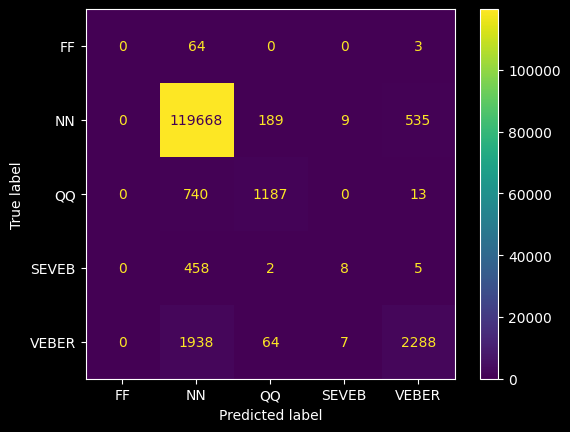

In [41]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print(f1_score(y_test, y_pred_sgd, average= 'weighted'))
print(precision_score(y_test, y_pred_sgd,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_sgd))
print(confusion_matrix(y_test, y_pred_sgd))
print(ConfusionMatrixDisplay.from_estimator(sgd, X_test, y_test))

0.988889366173414
0.988950133977588
0.989534353425907
[[     9     38      0      1     19]
 [     1 120031     81     64    224]
 [     0    242   1686      0     12]
 [     0    267      0    194     12]
 [     1    368      1      0   3927]]


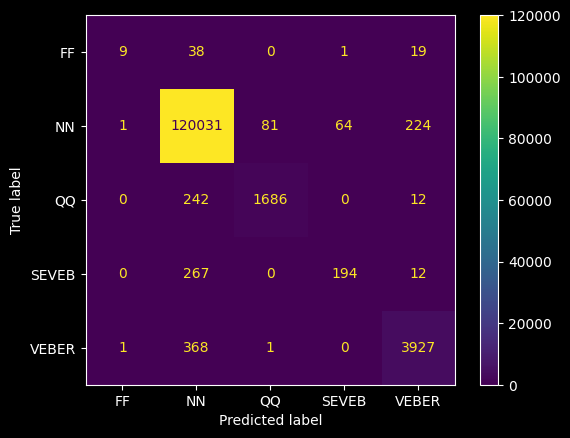

In [42]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(f1_score(y_test, y_pred_svc, average= 'weighted'))
print(precision_score(y_test, y_pred_svc,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))
print(ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test))

0.989840517665134
0.9897536413929032
0.9901712560348488
[[    15     35      0      1     16]
 [     1 120016    101    101    182]
 [     0    158   1773      0      9]
 [     0    191      2    274      6]
 [     6    428     12      1   3850]]


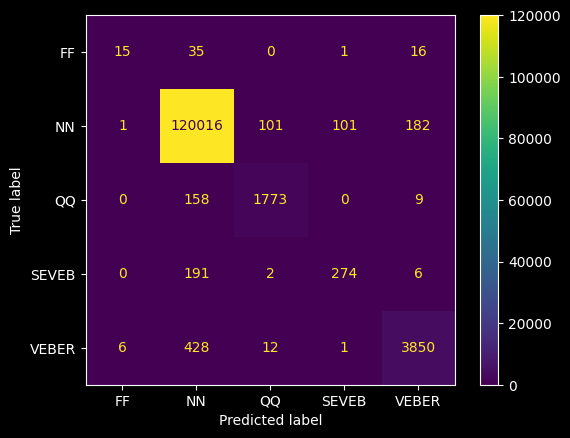

In [43]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_train, y_train)
y_pred_knc = knc.predict(X_test)
print(f1_score(y_test, y_pred_knc, average= 'weighted'))
print(precision_score(y_test, y_pred_knc,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_knc))
print(confusion_matrix(y_test, y_pred_knc))
print(ConfusionMatrixDisplay.from_estimator(knc, X_test, y_test))

0.9856884623819574
0.9857323440460709
0.9856500338108792
[[    11     39      0      1     16]
 [    41 119547    176    205    432]
 [     0    161   1762      2     15]
 [     0    194      3    265     11]
 [    20    471     15     23   3768]]


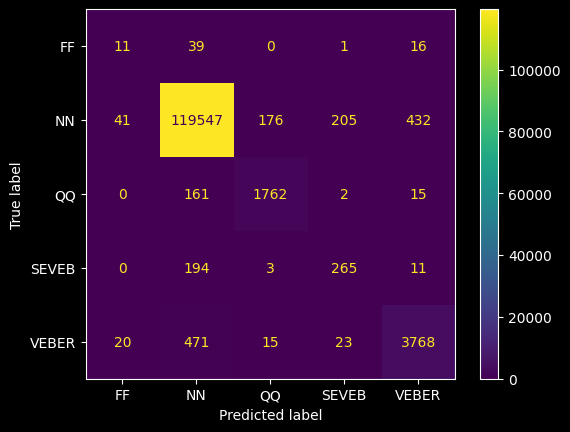

In [44]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print(f1_score(y_test, y_pred_dtc, average= 'weighted'))
print(precision_score(y_test, y_pred_dtc,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test))

0.625601879685151
0.9451352050683769
0.4877494535218355
[[    6    48     0     9     4]
 [  288 57591 41676 17513  3333]
 [    0    21  1899     0    20]
 [    4    73     8   380     8]
 [   42   817   826   457  2155]]


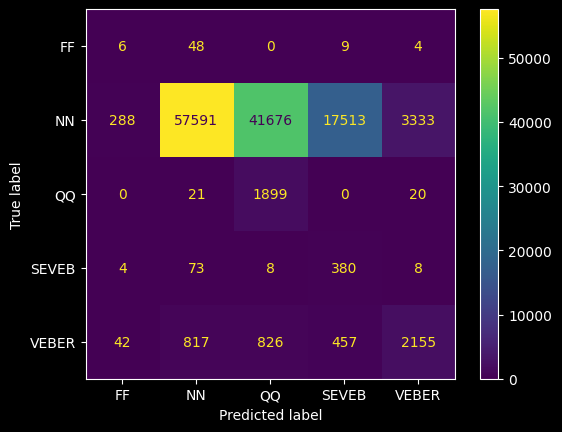

In [45]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(f1_score(y_test, y_pred_gnb, average= 'weighted'))
print(precision_score(y_test, y_pred_gnb,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test))

0.9911110952532102
0.9911159422181622
0.9914922392237652
[[     8     52      0      0      7]
 [     0 120093     70     69    169]
 [     0    129   1804      0      7]
 [     0    177      2    284     10]
 [     3    383      3      1   3907]]


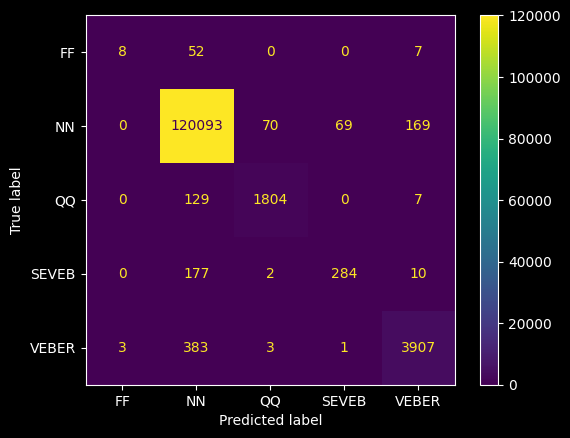

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(f1_score(y_test, y_pred_rfc, average= 'weighted'))
print(precision_score(y_test, y_pred_rfc,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test))

0.9867199834966461
0.9864665313973072
0.9873405777728852
[[     1     59      0      0      7]
 [    16 119968     73     84    260]
 [     0    268   1662      0     10]
 [     1    235      1    229      7]
 [     3    577      7      2   3708]]


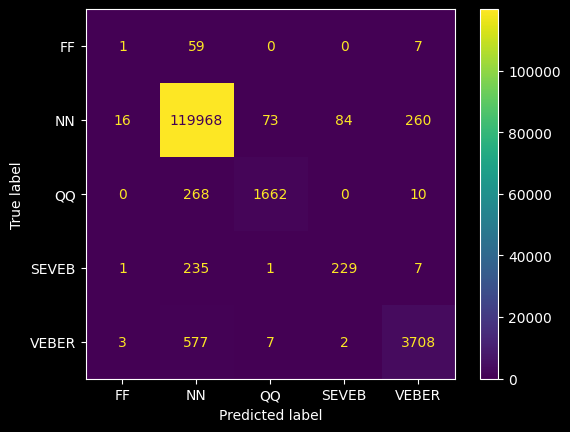

In [47]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print(f1_score(y_test, y_pred_gbc, average= 'weighted'))
print(precision_score(y_test, y_pred_gbc,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc))
print(ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test))

In [49]:
params = {'n_estimators': [110,120,130,140,150],'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [5,6,7,8,9,10],'min_samples_split': [3,4,5,6],'min_samples_leaf': [2,3,4,5],'min_impurity_decrease': [0.1,0.2,0.3,0.4,0.5], 'ccp_alpha': [0.1,0.01,0.001,0.00001]}

In [51]:
gscv = GridSearchCV(rfc, params)

Used feature extraction and decomposed the dataset

In [55]:
pca = PCA(n_components = 10)

In [56]:
data_pca = pca.fit_transform(X_train)

In [58]:
data_pca = pd.DataFrame(data_pca)

In [59]:
data_pca_test = pca.transform(X_test)

0.9459469980203771
0.9468385343317186
0.9567849785340232
[[     0     67      0      0      0]
 [     0 119925    207      0    269]
 [     0   1186    696      0     58]
 [     0    471      0      0      2]
 [     0   3139     89      8   1061]]


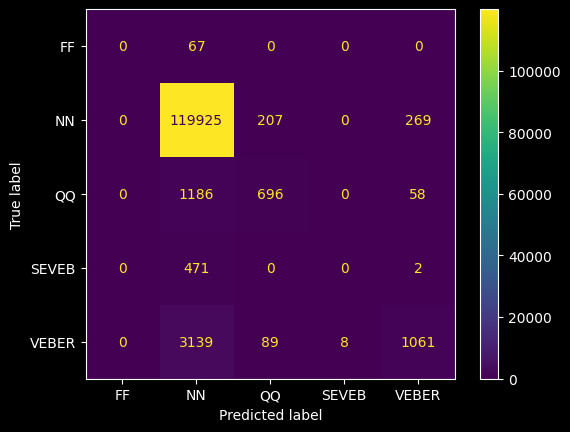

In [60]:
lr.fit(data_pca, y_train)
lr.score(data_pca, y_train)
y_pred_lrp = lr.predict(data_pca_test)
print(f1_score(y_test, y_pred_lrp, average= 'weighted'))
print(precision_score(y_test, y_pred_lrp,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_lrp))
print(confusion_matrix(y_test, y_pred_lrp))
print(ConfusionMatrixDisplay.from_estimator(lr, data_pca_test, y_test))

0.9357587526235236
0.944715485959587
0.9518706065514476
[[     0     67      0      0      0]
 [     0 120096     10      0    295]
 [     0   1696    230      0     14]
 [     0    473      0      0      0]
 [     0   3546     20      0    731]]


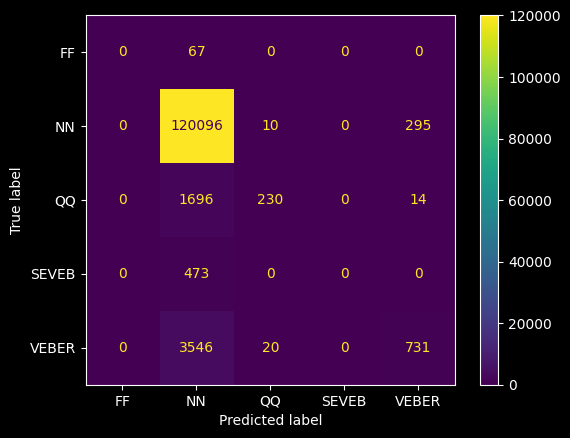

In [61]:
sgd.fit(data_pca, y_train)
sgd.score(data_pca, y_train)
y_pred_sgdp = sgd.predict(data_pca_test)
print(f1_score(y_test, y_pred_sgdp, average= 'weighted'))
print(precision_score(y_test, y_pred_sgdp,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_sgdp))
print(confusion_matrix(y_test, y_pred_sgdp))
print(ConfusionMatrixDisplay.from_estimator(sgd, data_pca_test, y_test))

0.983274722016004
0.9836736653530078
0.9846357074336757
[[     2     53      0      0     12]
 [     0 120096     60     41    204]
 [     0    448   1476      0     16]
 [     0    321      0    141     11]
 [     1    780      7      0   3509]]


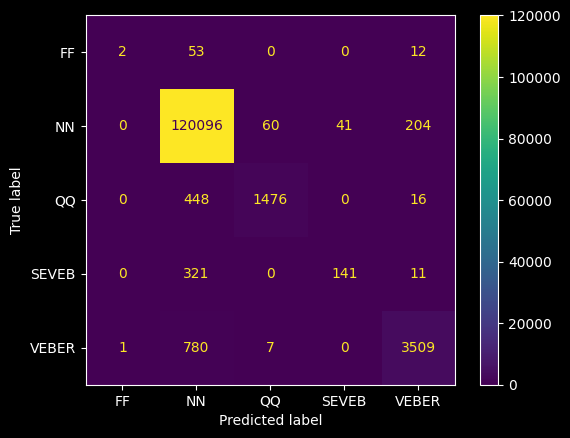

In [62]:
svc.fit(data_pca, y_train)
svc.score(data_pca, y_train)
y_pred_svcp = svc.predict(data_pca_test)
print(f1_score(y_test, y_pred_svcp, average= 'weighted'))
print(precision_score(y_test, y_pred_svcp,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_svcp))
print(confusion_matrix(y_test, y_pred_svcp))
print(ConfusionMatrixDisplay.from_estimator(svc, data_pca_test, y_test))

0.9863653467141652
0.9862374291137818
0.9868452090770417
[[    13     39      0      2     13]
 [     3 119924    135     90    249]
 [     0    268   1663      0      9]
 [     0    193      2    272      6]
 [     6    632     19      7   3633]]


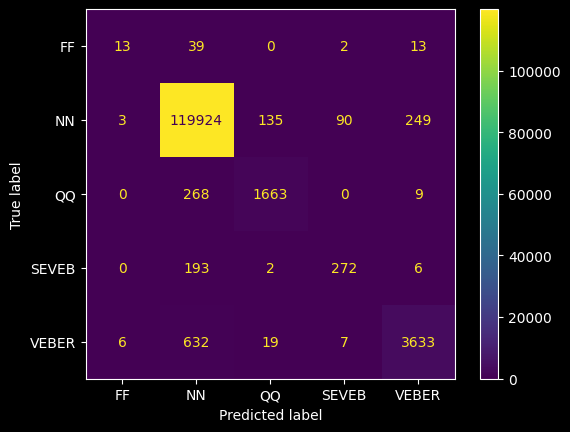

In [63]:
knc.fit(data_pca, y_train)
knc.score(data_pca, y_train)
y_pred_kncp = knc.predict(data_pca_test)
print(f1_score(y_test, y_pred_kncp, average= 'weighted'))
print(precision_score(y_test, y_pred_kncp,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_kncp))
print(confusion_matrix(y_test, y_pred_kncp))
print(ConfusionMatrixDisplay.from_estimator(knc, data_pca_test, y_test))

0.9770096765825471
0.9770070933131414
0.9770164651118904
[[     7     51      0      1      8]
 [    52 119043    316    228    762]
 [     1    306   1601      0     32]
 [     0    241      3    202     27]
 [    15    798     39     43   3402]]


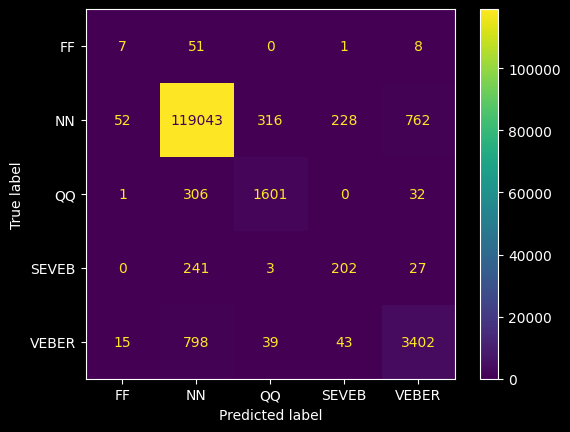

In [64]:
dtc.fit(data_pca, y_train)
dtc.score(data_pca, y_train)
y_pred_dtcp = dtc.predict(data_pca_test)
print(f1_score(y_test, y_pred_dtcp, average= 'weighted'))
print(precision_score(y_test, y_pred_dtcp,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_dtcp))
print(confusion_matrix(y_test, y_pred_dtcp))
print(ConfusionMatrixDisplay.from_estimator(dtc, data_pca_test, y_test))

0.9373022353101031
0.945566160788255
0.9336205947569548
[[     0     64      0      0      3]
 [     0 115459    202      6   4734]
 [     0    708   1151      0     81]
 [     0    455      0     10      8]
 [     0   2053    128      0   2116]]


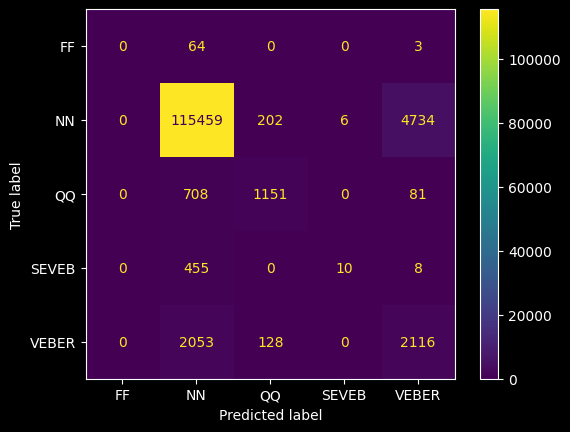

In [65]:
gnb.fit(data_pca, y_train)
gnb.score(data_pca, y_train)
y_pred_gnbp = gnb.predict(data_pca_test)
print(f1_score(y_test, y_pred_gnbp, average= 'weighted'))
print(precision_score(y_test, y_pred_gnbp,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_gnbp))
print(confusion_matrix(y_test, y_pred_gnbp))
print(ConfusionMatrixDisplay.from_estimator(gnb, data_pca_test, y_test))

0.9850607017590531
0.9852574885090021
0.9914922392237652
[[     1     59      0      0      7]
 [     0 120050     64     37    250]
 [     0    313   1613      0     14]
 [     0    305      0    159      9]
 [     1    691     10      0   3595]]


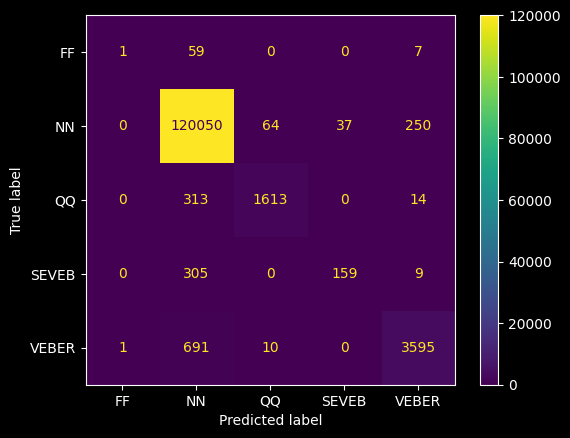

In [66]:
rfc.fit(data_pca, y_train)
rfc.score(data_pca, y_train)
y_pred_rfcp = rfc.predict(data_pca_test)
print(f1_score(y_test, y_pred_rfcp, average= 'weighted'))
print(precision_score(y_test, y_pred_rfcp,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfcp))
print(ConfusionMatrixDisplay.from_estimator(rfc, data_pca_test, y_test))

0.9762288589590549
0.976485749713894
0.9783059963201183
[[     0     66      0      0      1]
 [    21 119973     77     49    281]
 [     0    490   1434      0     16]
 [     0    341      0    125      7]
 [     2   1371     33      4   2887]]


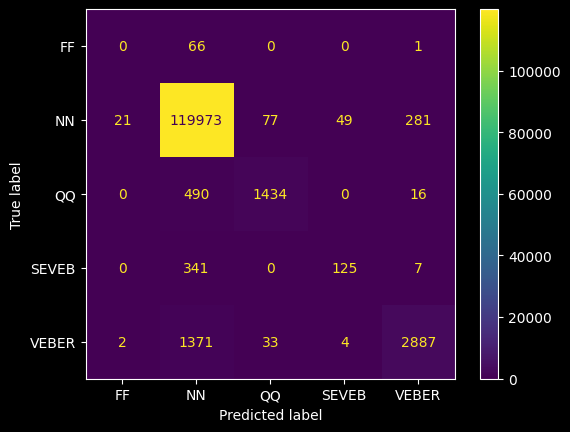

In [67]:
gbc.fit(data_pca, y_train)
gbc.score(data_pca, y_train)
y_pred_gbcp = gbc.predict(data_pca_test)
print(f1_score(y_test, y_pred_gbcp, average= 'weighted'))
print(precision_score(y_test, y_pred_gbcp,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_gbcp))
print(confusion_matrix(y_test, y_pred_gbcp))
print(ConfusionMatrixDisplay.from_estimator(gbc, data_pca_test, y_test))

Checked the F1-scores and precision score with different average hyperparameter

In [68]:
print(f1_score(y_test, y_pred_lr, average= 'macro'))
print(f1_score(y_test, y_pred_sgd, average= 'macro'))
print(f1_score(y_test, y_pred_svc, average= 'macro'))
print(f1_score(y_test, y_pred_knc, average= 'macro'))
print(f1_score(y_test, y_pred_gnb, average= 'macro'))
print(f1_score(y_test, y_pred_dtc, average= 'macro'))
print(f1_score(y_test, y_pred_rfc, average= 'macro'))
print(f1_score(y_test, y_pred_gbc, average= 'macro'))



0.46697769037158493
0.47175679771837215
0.7179728189333685
0.7648414728108457
0.24689395358624672
0.6970294158979983
0.7525839910610103
0.6789282514137691


In [69]:
print(f1_score(y_test, y_pred_lr, average= 'micro'))
print(f1_score(y_test, y_pred_sgd, average= 'micro'))
print(f1_score(y_test, y_pred_svc, average= 'micro'))
print(f1_score(y_test, y_pred_knc, average= 'micro'))
print(f1_score(y_test, y_pred_gnb, average= 'micro'))
print(f1_score(y_test, y_pred_dtc, average= 'micro'))
print(f1_score(y_test, y_pred_rfc, average= 'micro'))
print(f1_score(y_test, y_pred_gbc, average= 'micro'))

0.9678088977653367
0.9683357184418688
0.989534353425907
0.9901712560348488
0.4877494535218355
0.9856500338108792
0.9914922392237652
0.9873405777728852


In [70]:
print(precision_score(y_test, y_pred_lr,average= 'micro', zero_division= 1))
print(precision_score(y_test, y_pred_sgd,average= 'micro', zero_division= 1))
print(precision_score(y_test, y_pred_svc,average= 'micro', zero_division= 1))
print(precision_score(y_test, y_pred_knc,average= 'micro', zero_division= 1))
print(precision_score(y_test, y_pred_dtc,average= 'micro', zero_division= 1))
print(precision_score(y_test, y_pred_gnb,average= 'micro', zero_division= 1))
print(precision_score(y_test, y_pred_rfc,average= 'micro', zero_division= 1))
print(precision_score(y_test, y_pred_gbc,average= 'micro', zero_division= 1))


0.9678088977653367
0.9683357184418688
0.989534353425907
0.9901712560348488
0.9856500338108792
0.4877494535218355
0.9914922392237652
0.9873405777728852


In [71]:
print(precision_score(y_test, y_pred_lr,average= 'macro', zero_division= 1))
print(precision_score(y_test, y_pred_sgd,average= 'macro', zero_division= 1))
print(precision_score(y_test, y_pred_svc,average= 'macro', zero_division= 1))
print(precision_score(y_test, y_pred_knc,average= 'macro', zero_division= 1))
print(precision_score(y_test, y_pred_dtc,average= 'macro', zero_division= 1))
print(precision_score(y_test, y_pred_gnb,average= 'macro', zero_division= 1))
print(precision_score(y_test, y_pred_rfc,average= 'macro', zero_division= 1))
print(precision_score(y_test, y_pred_gbc,average= 'macro', zero_division= 1))

0.7845531105605227
0.786990420228049
0.8899217484300663
0.8577106004340569
0.6937893104862706
0.29102526878634444
0.887282443052762
0.7295168765880977


Final Model

0.9911989203854042
0.991198306628795
0.9915865951658306
[[     7     53      0      0      7]
 [     0 120098     62     70    171]
 [     0    125   1807      0      8]
 [     0    177      2    284     10]
 [     3    380      2      0   3912]]


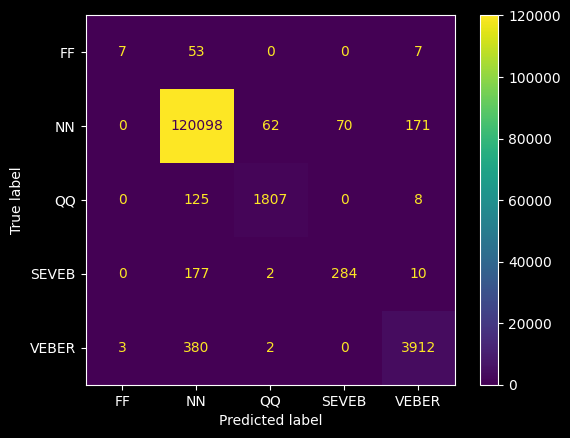

In [72]:
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)
final_model.score(X_train, y_train)
y_pred_fm = final_model.predict(X_test)
print(f1_score(y_test, y_pred_fm, average= 'weighted'))
print(precision_score(y_test, y_pred_fm,average= 'weighted', zero_division= 1))
print(accuracy_score(y_test,y_pred_fm))
print(confusion_matrix(y_test, y_pred_fm))
print(ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test))